# Intro to Data Analysis

In [4]:
import unicodecsv

enrollments_filename = './resources/enrollments.csv'

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
### Write code similar to the above to load the engagement
### and submission data. The data is stored in files with
### the given filenames. Then print the first row of each
### table to make sure that your code works. You can use the
### "Test Run" button to see the output of your code.

engagement_filename = './resources/daily_engagement.csv'
submissions_filename = './resources/project_submissions.csv'
    
with open(engagement_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open(submissions_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

In [5]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
        
def count_unique(values, key):
    return len(set([rec[key] for rec in values]))

enrollments = read_csv('./resources/enrollments.csv')
daily_engagement = read_csv('./resources/daily_engagement.csv')
project_submissions = read_csv('./resources/project_submissions.csv')
    
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = count_unique(enrollments, 'account_key')

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = count_unique(daily_engagement, 'acct')

submission_num_rows = len(project_submissions)
submission_num_unique_students = count_unique(project_submissions, 'account_key')

In [6]:
from datetime import datetime

def set_record_type(data, column, data_type):
    for record in data:
        if record[column]:
            if data_type == 'float':
                record[column] = float(record[column])
            elif data_type == 'integer':
                record[column] = int(float(record[column]))
            elif data_type == 'date':
                record[column] = datetime.strptime(record[column],'%Y-%m-%d')
            elif data_type == 'boolean':
                record[column] = True if record[column] == 'True' else False
        else:
            record[column] = None
    return data

enrollments = set_record_type(enrollments, 'join_date', 'date')
enrollments = set_record_type(enrollments, 'cancel_date', 'date')
enrollments = set_record_type(enrollments, 'days_to_cancel', 'integer')
enrollments = set_record_type(enrollments, 'is_udacity', 'boolean')
enrollments = set_record_type(enrollments, 'is_canceled', 'boolean')

daily_engagement = set_record_type(daily_engagement, 'utc_date', 'date')
daily_engagement = set_record_type(daily_engagement, 'num_courses_visited', 'integer')
daily_engagement = set_record_type(daily_engagement, 'total_minutes_visited', 'float')
daily_engagement = set_record_type(daily_engagement, 'lessons_completed', 'integer')
daily_engagement = set_record_type(daily_engagement, 'projects_completed', 'integer')

project_submissions = set_record_type(project_submissions, 'creation_date', 'date')
project_submissions = set_record_type(project_submissions, 'completion_date', 'date')

In [12]:
enrollment_num_unique_students

1302

In [13]:
engagement_num_unique_students

1237

In [14]:
submission_num_unique_students

743

In [7]:
for rec in daily_engagement:
    rec['account_key'] = rec['acct']
    del[rec['acct']]

In [8]:
def get_unique_students(data):
    return set([rec['account_key'] for rec in data])

In [9]:
enrollment_num_rows = len(enrollments)
enrollment_unique_students = get_unique_students(enrollments)

engagement_num_rows = len(daily_engagement)
engagement_unique_students = get_unique_students(daily_engagement)

submission_num_rows = len(project_submissions)
submission_unique_students = get_unique_students(project_submissions)

In [10]:
daily_engagement[0]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [11]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students:
        print(enrollment)
        break

{'account_key': '1219', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'status': 'canceled', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True, 'is_udacity': False}


In [12]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)

{'account_key': '1304', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'days_to_cancel': 59, 'status': 'canceled', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_canceled': True, 'is_udacity': True}
{'account_key': '1304', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 99, 'status': 'canceled', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'is_canceled': True, 'is_udacity': True}
{'account_key': '1101', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'days_to_cancel': None, 'status': 'current', 'cancel_date': None, 'is_canceled': False, 'is_udacity': True}


In [13]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity'] == True:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [14]:
def remove_udacity_account(data):
    return [rec for rec in data if rec['account_key'] not in udacity_test_accounts]

In [15]:
enrollments_non_udacity = remove_udacity_account(enrollments)
engagement_non_udacity = remove_udacity_account(daily_engagement)
submission_non_udacity = remove_udacity_account(project_submissions)

print(len(enrollments_non_udacity))
print(len(engagement_non_udacity))
print(len(submission_non_udacity))

1622
135656
3634


In [16]:
paid_students = {}
for enrollment in enrollments_non_udacity:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        student = enrollment['account_key']
        join_date = enrollment['join_date']
        if student not in paid_students or join_date > paid_students[student]:
            paid_students[student] = join_date
            
len(paid_students)

995

In [24]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [25]:
def remove_free_trial(data):
    return [rec for rec in data if rec['account_key'] in paid_students]

enrollments_paid = remove_free_trial(enrollments_non_udacity)
engagement_paid = remove_free_trial(engagement_non_udacity)
submission_paid = remove_free_trial(submission_non_udacity)

paid_engagement_in_first_week = []
for rec in engagement_paid:
    student = rec['account_key']
    if within_one_week(paid_students[student], rec['utc_date']):
        paid_engagement_in_first_week.append(rec)
        
len(paid_engagement_in_first_week)

6919

In [26]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for rec in paid_engagement_in_first_week:
    account_key = rec['account_key']
    engagement_by_account[account_key].append(rec)
    
len(engagement_by_account)

995

In [27]:
total_minutes_by_accounts = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_accounts[account_key] = total_minutes

In [28]:
total_minutes = list(total_minutes_by_accounts.values())

import numpy as np
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [29]:
def print_statistics(data):
    data_list = list(data.values())
    print('Mean:', np.mean(data_list))
    print('Standard deviation:', np.std(data_list))
    print('Minimum:', np.min(data_list))
    print('Maximum:', np.max(data_list))

print_statistics(total_minutes_by_accounts)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [30]:
def group_data_by(data, key):
    grouped_data = defaultdict(list)
    for rec in data:
        group_key = rec[key]
        grouped_data[group_key].append(rec)
    return grouped_data

In [34]:
def sum_grouped_items(data, entry):
    sum_group = {}
    for key,record in data.items():
        total = 0
        for rec in record:
            total += rec[entry]
        sum_group[key] = total
    return sum_group

In [35]:
engagement_by_account = group_data_by(paid_engagement_in_first_week, 'account_key')

total_minutes_by_accounts = sum_grouped_items(engagement_by_account,'total_minutes_visited')
print_statistics(total_minutes_by_accounts)

total_lessons_completed_by_accounts = sum_grouped_items(engagement_by_account,'lessons_completed')
print_statistics(total_lessons_completed_by_accounts)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [100]:
for rec in paid_engagement_in_first_week:
    rec['has_visited'] = 1 if rec['num_courses_visited'] > 0 else 0

total_num_courses_visited = sum_grouped_items(engagement_by_account,'has_visited')
print_statistics(total_num_courses_visited)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [52]:
subway_project_lesson_keys = ['746169184','3176718735']
rating_pass_values = ['PASSED','DISTINCTION']

In [39]:
submission_paid[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [74]:
submission_by_lesson = group_data_by(submission_paid, 'lesson_key')
for _,record in submission_by_lesson.items():
    for rec in record:
        rec['has_passed'] = 1 if rec['assigned_rating'] in rating_pass_values else 0
        
total_pass_by_lesson = sum_grouped_items(submission_by_lesson,'has_passed')
total_pass_by_lesson

{'3165188753': 214,
 '3168208620': 373,
 '3174288624': 122,
 '3176718735': 652,
 '3184238632': 53,
 '3562208770': 0,
 '4110338963': 12,
 '4180859007': 4,
 '4576183932': 139,
 '4582204201': 85,
 '746169184': 0}

In [75]:
sum(value for key,value in total_pass_by_lesson.items() if key in subway_project_lesson_keys)

652

In [77]:
passing_engagement = []
non_passing_engagement = []
for lesson,submissions in submission_by_lesson.items():
    if lesson in subway_project_lesson_keys:
        for submission in submissions:
            if submission['has_passed']:
                passing_engagement.append(rec)
            else:
                non_passing_engagement.append(rec)

print(len(passing_engagement))
print(len(non_passing_engagement))   

652
845


In [78]:
pass_subway_project = set()
for rec in submission_paid:
    if rec['lesson_key'] in subway_project_lesson_keys and rec['assigned_rating'] in rating_pass_values:
        pass_subway_project.add(rec['account_key'])

print(len(pass_subway_project))

647


In [80]:
passing_engagement = []
non_passing_engagement = []
for rec in paid_engagement_in_first_week:
    if rec['account_key'] in pass_subway_project:
        passing_engagement.append(rec)
    else:
        non_passing_engagement.append(rec)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [82]:
passing_engagement_by_accounts = group_data_by(passing_engagement, 'account_key')
non_passing_engagement_by_accounts = group_data_by(non_passing_engagement, 'account_key')
passing_minutes = sum_grouped_items(passing_engagement_by_accounts,'total_minutes_visited')
print_statistics(passing_minutes)
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_accounts,'total_minutes_visited')
print_statistics(non_passing_minutes)

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [83]:
passing_lessons_completed = sum_grouped_items(passing_engagement_by_accounts,'lessons_completed')
print_statistics(passing_lessons_completed)
non_passing_lessons_completed = sum_grouped_items(non_passing_engagement_by_accounts,'lessons_completed')
print_statistics(non_passing_lessons_completed)

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

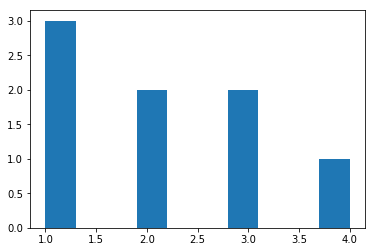

In [85]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [94]:
def draw_hist(data):
    data_list = list(data.values())
    plt.hist(data_list)

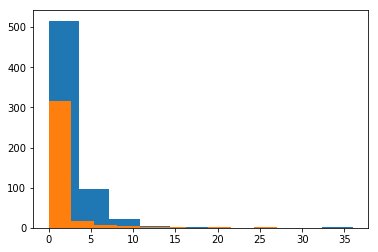

In [97]:
draw_hist(passing_lessons_completed)
draw_hist(non_passing_lessons_completed)

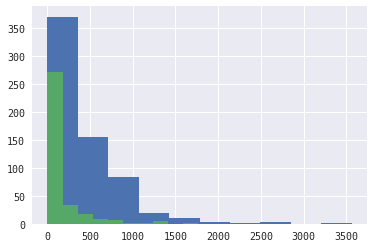

In [119]:
draw_hist(passing_minutes)
draw_hist(non_passing_minutes)

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


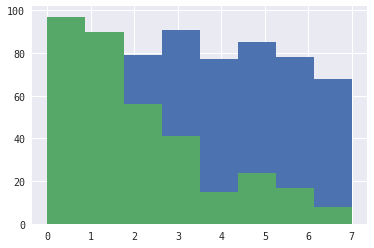

In [122]:
passing_days_visited = sum_grouped_items(passing_engagement_by_accounts,'has_visited')
print_statistics(passing_days_visited)
non_passing_days_visited = sum_grouped_items(non_passing_engagement_by_accounts,'has_visited')
print_statistics(non_passing_days_visited)

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] = 'monospace'

%matplotlib inline
def print_statistics(data):
    data_list = list(data.values())
    print('Mean:', np.mean(data_list))
    print('Standard deviation:', np.std(data_list))
    print('Minimum:', np.min(data_list))
    print('Maximum:', np.max(data_list))
    plt.hist(data_list, bins=8)